<a href="https://colab.research.google.com/github/MatthaeusSurafial/Mathi/blob/main/Kaggle_Distil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.4/508.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatibl

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.16.1
Keras version: 0.1.7
KerasNLP version: 0.9.3


In [ ]:
true = pd.read_csv('/content/true.csv.zip')
fake = pd.read_csv('/content/fake.csv.zip')

<Axes: ylabel='count'>

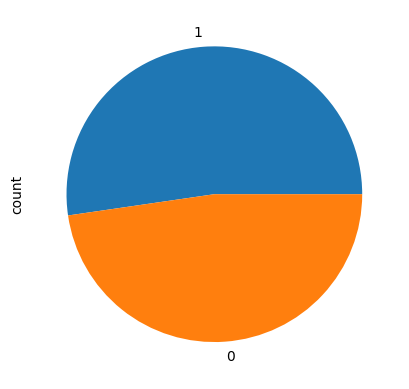

In [ ]:
true['true_or_fake']=0
fake['true_or_fake']=1
df= pd.concat([fake, true], ignore_index=True)
df1 = df.sample(frac=1).reset_index(drop=True)
df1.true_or_fake.value_counts().plot(kind='pie')

In [ ]:
from keras.optimizers import Adam

# Initialisiere den Adam-Optimizer
optimizer = Adam(learning_rate=5e-4)

# Kompiliere das Modell mit dem initialisierten Optimizer
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
pip install transformers


In [ ]:
import tensorflow as tf

# Definiere den Verlust (loss)
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Definiere den Optimierer
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

# Definiere die Metriken
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

# Kompiliere das Modell
classifier.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

In [ ]:

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False


classifier.summary()

Preprocessor: "distil_bert_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 66,362,880 (253.15 MB)

In [ ]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(df1["text"],
                                                    df1["true_or_fake"],
                                                    test_size=0.30,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp,
                                                  y_temp,
                                                  test_size=0.30,
                                                  random_state=42)

In [ ]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=2,
               batch_size=64
              )

Epoch 1/2
344/344 ━━━━━━━━━━━━━━━━━━━━ 733s 2s/step - loss: 0.2073 - sparse_categorical_accuracy: 0.9286 - val_loss: 0.0620 - val_sparse_categorical_accuracy: 0.9772
Epoch 2/2
344/344 ━━━━━━━━━━━━━━━━━━━━ 593s 2s/step - loss: 0.0693 - sparse_categorical_accuracy: 0.9748 - val_loss: 0.0427 - val_sparse_categorical_accuracy: 0.9847


In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["true","fake"],
        cmap=plt.cm.Blues
    )
    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))
    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))
y_pred_test = classifier.predict(X_test)

421/421 ━━━━━━━━━━━━━━━━━━━━ 219s 510ms/step


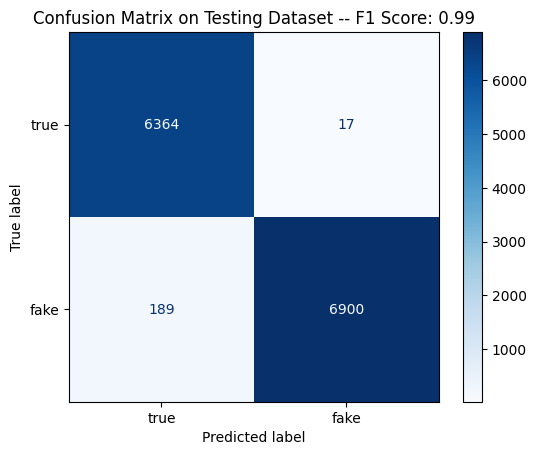

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Testing")

295/295 ━━━━━━━━━━━━━━━━━━━━ 148s 502ms/step


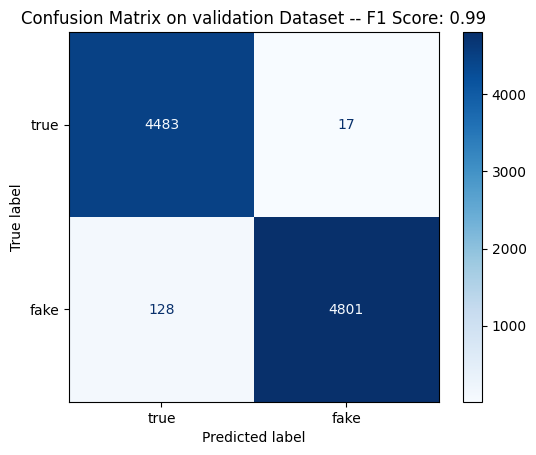

In [ ]:
y_pred_val = classifier.predict(X_val)

displayConfusionMatrix(y_val, y_pred_val,  "validation")

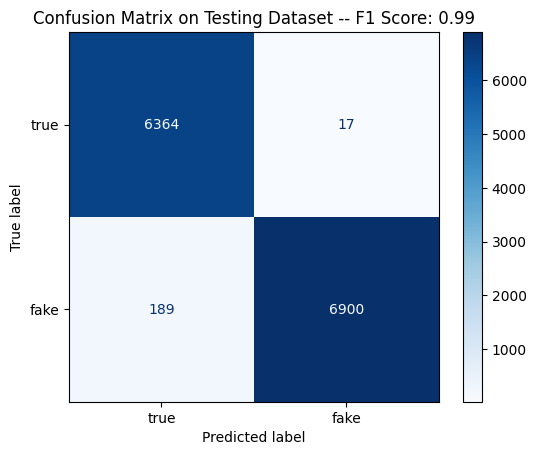

Classification Report on Testing Dataset:
              precision    recall  f1-score   support

        true       0.97      1.00      0.98      6381
        fake       1.00      0.97      0.99      7089

    accuracy                           0.98     13470
   macro avg       0.98      0.99      0.98     13470
weighted avg       0.99      0.98      0.98     13470



In [ ]:
from sklearn.metrics import classification_report

# Define the displayConfusionMatrix function
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["true","fake"],
        cmap=plt.cm.Blues
    )
    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))
    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))
    plt.show()

    # Print Classification Report
    report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=["true", "fake"])
    print("Classification Report on", dataset, "Dataset:")
    print(report)

# Call the function
displayConfusionMatrix(y_test, y_pred_test, "Testing")

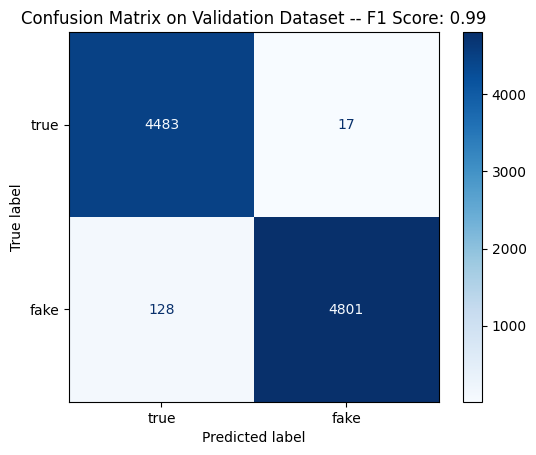

Classification Report on Validation Dataset:
              precision    recall  f1-score   support

        true       0.97      1.00      0.98      4500
        fake       1.00      0.97      0.99      4929

    accuracy                           0.98      9429
   macro avg       0.98      0.99      0.98      9429
weighted avg       0.98      0.98      0.98      9429



In [ ]:
# Display confusion matrix and classification report for the validation set
displayConfusionMatrix(y_val, y_pred_val, "Validation")